# Random Forest Classifier and Final Predictions on Exoplanet Candidates
###  Nathan Kirse

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

# Read-in csv file

In [2]:
df = pd.read_csv("errors.csv",  header=100)
pd.set_option('display.max_columns', None)
df.drop(['koi_time0bk', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2',
                'koi_ingress', 'koi_ingress_err1', 'koi_ingress_err2', 
                'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1', 'koi_teq_err2',
                'koi_sma_err1', 'koi_sma_err2',
                'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_bin_oedp_sig'],
                axis = 1, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
print(df.shape)
print(df.koi_disposition.value_counts())
df.head()

(5145, 76)
FALSE POSITIVE    3056
CONFIRMED         2089
Name: koi_disposition, dtype: int64


,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_incl,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_msky,koi_dikco_msky_err
0,CONFIRMED,9.488036,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,2.26,0.26,-0.15,0.0853,89.66,793.0,93.59,29.45,-16.65,24.810,2.600,-2.600,0.2291,0.4603,5.135849,28.470820,35.8,2,142.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,0.430,0.510,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,0.200,0.170,0.320,0.160
1,CONFIRMED,54.418383,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,2.83,0.32,-0.19,0.2734,89.57,443.0,9.11,2.87,-1.62,77.900,28.400,-28.400,0.2291,0.4603,7.027669,20.109507,25.8,2,25.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,-0.630,0.720,1.230,0.680,0.000660,0.000650,-0.001050,0.000630,0.390,0.360,0.500,0.450
2,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,0.387394,0.109232,-0.084950,0.22080,0.00917,-0.01837,33.46,8.50,-2.83,0.0267,67.09,1395.0,891.96,668.95,-230.35,3.278,0.136,-0.136,0.2865,0.3556,39.066550,541.895100,505.6,1,621.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,-0.52,0.30,-0.30,0.791,0.201,-0.067,0.836,0.093,-0.077,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,-0.111,0.031,0.002,0.027,0.003020,0.000570,-0.001420,0.000810,0.289,0.079,0.276,0.076
3,CONFIRMED,2.525592,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,0.024064,0.003751,-0.001522,1.98635,2.71141,-1.74541,2.75,0.88,-0.35,0.0374,85.41,1406.0,926.16,874.33,-314.24,8.750,4.000,-4.000,0.2844,0.3661,4.749945,33.191900,40.9,1,515.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,0.07,0.25,-0.30,1.046,0.334,-0.133,1.095,0.151,-0.136,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952,0.733,-0.010,0.350,0.230,0.370,0.000080,0.000200,-0.000070,0.000220,0.100,0.140,0.070,0.200
4,FALSE POSITIVE,7.361790,2.128000e-05,-2.128000e-05,0.002530,-0.002530,1.169,7.133,-0.044,5.02200,0.13600,-0.13600,233.7,5.8,-5.8,0.183387,7.128076,-0.043131,0.00485,0.27864,-0.00053,39.21,6.45,-9.67,0.0820,60.92,1342.0,767.22,349.28,-365.49,2.400,1.200,-1.200,0.3050,0.3201,10.964684,46.153080,47.7,1,185.0,6227.0,111.0,-124.0,3.986,0.182,-0.098,0.00,0.15,-0.15,1.958,0.322,-0.483,1.358,0.121,-0.207,12.660,12.999,12.609,12.515,12.480,11.659,11.415,11.396,0.000,-13.450,0.250,24.090,0.220,0.003032,0.000062,-0.005549,0.000058,8.930,0.074,8.948,0.077


# Split Data

In [3]:
X = df.drop(['koi_disposition'], axis=1)
y = df.koi_disposition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Cross-Validation
## Trial 1 - Fully Grown Forest

In [52]:
import time
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit

rnd_clf = RandomForestClassifier(random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)

start=time.time()
scores=cross_validate(rnd_clf, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
#Not sure if std is multiplied by two or not.
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

1.1339681148529053
Validation Accuracy: 96.90 (+/- 0.89)
Train Accuracy: 99.84 (+/- 0.16)


## Trial 2 - Min Samples Split

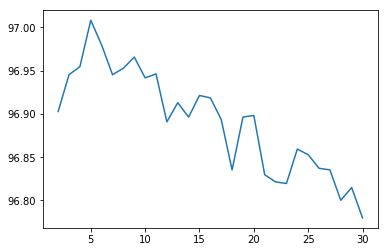

In [13]:
#Default is 2
splits = [None,None]
for i in range(2,31):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(min_samples_split=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(splits)
plt.show()
#5 May be better.

## Trial 3 - Min Samples Leaf

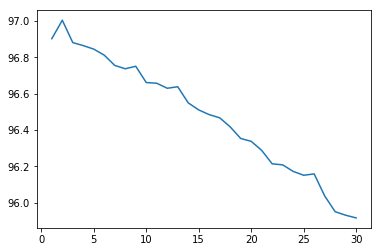

In [14]:
#Default is 1
splits = [None]
for i in range(1,31):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(min_samples_leaf=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(splits)
plt.show()
#2 may be slightly better.

## Trial 4 - Max Features

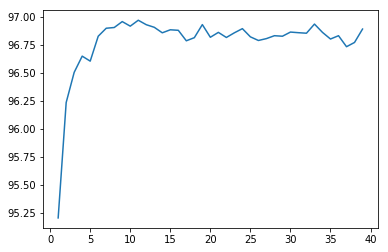

In [15]:
#Default sqrt(n_features). Which is 9 for this data set. 
splits = [None]
for i in range(1,40):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(max_features=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(splits)
plt.show()
#Default is fine.

## Trial 5 - Num Estimators

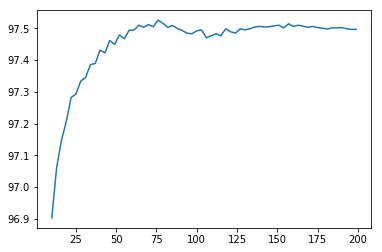

593.5913195610046


In [20]:
#Default 10
import time
start = time.time()

splits = []
for i in range(10,201,3):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(n_estimators=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(range(10,201,3), splits)
plt.show()

end = time.time()

print(end-start)
#Higher is better.Peak around 75

## Trial 6 - Max Leaf Nodes

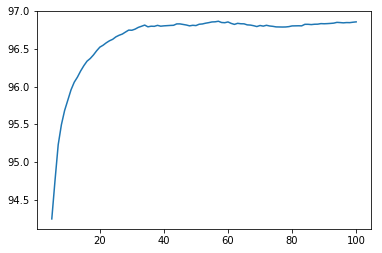

102.9906907081604


In [21]:
#Default None (infinity)
import time
start = time.time()

splits = [None]*5
for i in range(5,101):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(max_leaf_nodes=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train, y_train, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(splits)
plt.show()

end = time.time()

print(end-start)
#Clear increase with higher number of leaf nodes

# Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

parameters = {'n_estimators':[50,75,100],
              'min_samples_leaf': [1,2,3],
              'min_samples_split': [2,4,5,6],
              'max_features': [7,8,9,10],
              'criterion': ('gini', 'entropy')
              }

rnd_clf = RandomForestClassifier(random_state=3)

ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)

grid = GridSearchCV(rnd_clf, parameters, cv=ss, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 100 folds for each of 288 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=3, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 75, 100], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 4, 5, 6], 'max_features': [7, 8, 9, 10], 'criterion': ('gini', 'entropy')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [29]:
grid.best_score_ 

0.9751896392229418

In [30]:
grid.best_params_

{'criterion': 'entropy',
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# Feature Importance

In [6]:
import time
from sklearn.model_selection import StratifiedShuffleSplit

rnd_clf = RandomForestClassifier(random_state=3)

start=time.time()
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(rnd_clf, X_train, y_train, cv=ss, return_train_score=True, 
                      return_estimator=True, scoring='accuracy', n_jobs=-1)
end=time.time()

print(end-start)

31.685763835906982


In [7]:
feature_importance = [0]*len(scores['estimator'][0].feature_importances_)

for estimator in scores['estimator']:
    for i in range(len(estimator.feature_importances_)):
        feature_importance[i] += estimator.feature_importances_[i] / len(scores['estimator'])  

feature_importance = pd.DataFrame(feature_importance,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importance

,importance
koi_dikco_msky,0.161427
koi_dicco_msky,0.066916
koi_steff_err2,0.048979
koi_fwm_stat_sig,0.047255
koi_prad_err1,0.046603
koi_steff_err1,0.046419
koi_ror_err1,0.039289
koi_smet_err2,0.038680
koi_smet_err1,0.038412
koi_count,0.033672


## See how removing features affects scoring.

In [ ]:
import time
# use the range blow to get the accuracies for each top n features 
range_of_features = list(range(15,76))

# Try to define a function which runs a random forest with top n 
# feature and return the accuracy
start = time.time()
def accuracy_top_n_features(n):
    rnd_clf = RandomForestClassifier(random_state=3)
    
    ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
    scores=cross_validate(rnd_clf, X_train[list(feature_importance.index[:n])], y_train, 
                          cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    
    return scores['test_score'].mean()*100

scores = []
for features in range_of_features:
    scores.append(accuracy_top_n_features(features))
    
end = time.time()
print(end-start)
scores

In [ ]:
scores = np.array(scores)
print(scores.argmax(), "features will give a score of: ", round(max(scores),3), "%")
import matplotlib.pyplot as plt
plt.plot(range_of_features, scores)
plt.show()

### Conclusion:
Using 34 features consistently return the best score.

# New Train-Test Split with Reduced Features

In [8]:
X_r = df.drop(['koi_disposition'], axis=1)[list(feature_importance.index[:34])]
y_r = df.koi_disposition
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.30, random_state=42)
X_train_r.shape

(3601, 34)

## Trial 1 - Fully Grown Forest

In [51]:
import time
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit

rnd_clf = RandomForestClassifier(random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)

start=time.time()
scores=cross_validate(rnd_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
#Not sure if std is multiplied by two or not.
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

0.7818818092346191
Validation Accuracy: 96.83 (+/- 0.95)
Train Accuracy: 99.83 (+/- 0.18)


## Trail 2 - Min Samples Split

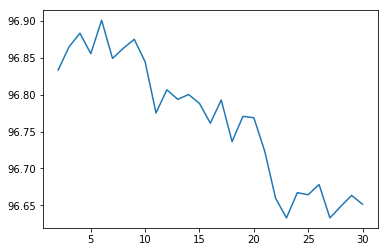

44.79805898666382


In [18]:
import time

start = time.time()

#Default is 2
splits = [None,None]
for i in range(2,31):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(min_samples_split=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(splits)
plt.show()
#6 may be better.

end = time.time()
print(end-start)

## Trail 3 - Min Samples Leaf

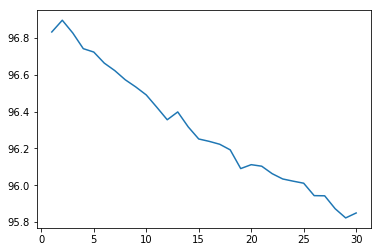

21.543400526046753


In [54]:
import time

start = time.time()

#Default is 1
splits = [None]
for i in range(1,31):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(min_samples_leaf=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(splits)
plt.show()
#2 may be better
end = time.time()
print(end-start)

## Trial 4 - Max Features

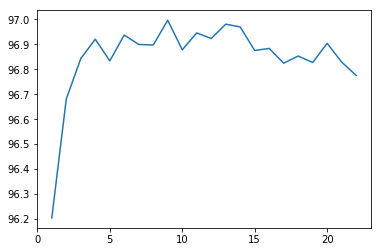

28.75013256072998


In [55]:
import time

start = time.time()

#Default sqrt(n_features). Which is 6 for this data set with 34 features. 
splits = [None]
for i in range(1,23):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(max_features=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(splits)
plt.show()
#6 or 9 features may be better.

end = time.time()
print(end-start)

## Trial 5 - Number of Estimators

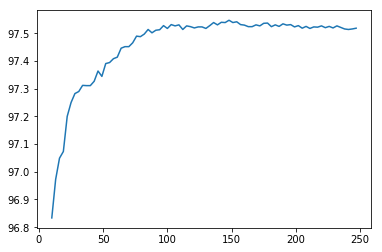

568.6706068515778


In [56]:
#Default 10
import time
start = time.time()

splits = []
for i in range(10,250,3):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(n_estimators=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(range(10,250,3), splits)
plt.show()

end = time.time()

print(end-start)
#Higher is better. Peak around 145.

## Trial 6 - Max Leaf Nodes

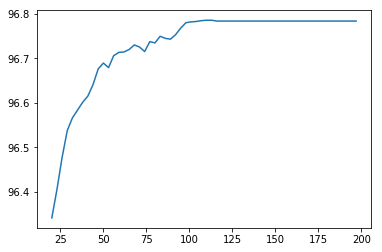

45.95315933227539


In [57]:
#Default None (infinity)
import time
start = time.time()

splits = []
for i in range(20,200,3):
    ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
    rnd_clf = RandomForestClassifier(max_leaf_nodes=i, random_state=3)
    scores=cross_validate(rnd_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(range(20,200,3), splits)
plt.show()

end = time.time()

print(end-start)
#Clear increase with higher number of leaf nodes

## Try for a Best

In [66]:
import time

rnd_clf = RandomForestClassifier(n_estimators=145, max_features=9, min_samples_leaf=2,  
                                 min_samples_split=6, criterion ='entropy', random_state=3)

start=time.time()
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(rnd_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

15.29510760307312
Validation Accuracy: 97.43 (+/- 0.88)
Train Accuracy: 99.66 (+/- 0.16)


### Test it

In [61]:
rnd_clf = RandomForestClassifier(n_estimators=145, max_features=9, min_samples_leaf=2,  
                                 min_samples_split=6, criterion ='entropy', random_state=3)
rnd_clf.fit(X_train_r, y_train_r)
preds = rnd_clf.predict(X_test_r)
print(accuracy_score(y_test_r, preds))
print(confusion_matrix(y_test_r, preds))
print(classification_report(y_test_r, preds))

0.9734455958549223
[[632  20]
 [ 21 871]]
                precision    recall  f1-score   support

     CONFIRMED       0.97      0.97      0.97       652
FALSE POSITIVE       0.98      0.98      0.98       892

     micro avg       0.97      0.97      0.97      1544
     macro avg       0.97      0.97      0.97      1544
  weighted avg       0.97      0.97      0.97      1544



# More Grid Search - More Focussed

In [62]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

parameters = [{'n_estimators':[135,140,145,150],
              'max_features': [4,5,6,7,8,9],
              'criterion': ('gini', 'entropy'),
              'min_samples_split': [2,4,5,6,8],
              'min_samples_leaf': [1,2]
              }]

rnd_clf = RandomForestClassifier(random_state=3)

ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)

grid = GridSearchCV(rnd_clf, parameters, cv=ss, n_jobs=-1, verbose=3)
grid.fit(X_train_r, y_train_r)

end = time.time()
print(end-start)

Fitting 100 folds for each of 480 candidates, totalling 48000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

4842.229176998138


In [63]:
grid.best_score_ 

0.9755041628122109

In [64]:
grid.best_params_

{'criterion': 'gini',
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [68]:
#Best score yet: 98.08%
rnd_clf = RandomForestClassifier(n_estimators=150, max_features=5, criterion='gini', n_jobs=-1, random_state=3)
rnd_clf.fit(X_train_r, y_train_r)
preds = rnd_clf.predict(X_test_r)
print(accuracy_score(y_test_r, preds))
print(confusion_matrix(y_test_r, preds))
print(classification_report(y_test_r, preds))

0.9747409326424871
[[631  21]
 [ 18 874]]
                precision    recall  f1-score   support

     CONFIRMED       0.97      0.97      0.97       652
FALSE POSITIVE       0.98      0.98      0.98       892

     micro avg       0.97      0.97      0.97      1544
     macro avg       0.97      0.97      0.97      1544
  weighted avg       0.97      0.97      0.97      1544



# More Grid Search - Even More Focussed

In [76]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

parameters = [{'n_estimators':list(range(146,160)),
              'max_features': [3,4,5,6],
              'criterion': ('gini', 'entropy'),
              }]

rnd_clf = RandomForestClassifier(random_state=3)

ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)

grid = GridSearchCV(rnd_clf, parameters, cv=ss, n_jobs=-1, verbose=3)
grid.fit(X_train_r, y_train_r)

end = time.time()
print(end-start)

Fitting 100 folds for each of 112 candidates, totalling 11200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

996.6458930969238


In [77]:
grid.best_score_ 

0.9755041628122109

In [79]:
grid.best_params_
#These are the same as the last grid search

{'criterion': 'gini', 'max_features': 5, 'n_estimators': 150}

# Calculating Accuracy of Best Model
Best Model:
n_estimators = 150,
max_features = 5,
criterion='gini'

In [82]:
import time

rnd_clf = RandomForestClassifier(n_estimators=150, max_features=5, criterion='gini', random_state=3)

start=time.time()
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(rnd_clf, X_r, y_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

#This is the best validation score yet.

131.2434914112091
Validation Accuracy: 97.6181 (+/- 0.72)
Train Accuracy: 100.00 (+/- 0.00)


### AUC 

In [9]:
import time

rnd_clf = RandomForestClassifier(n_estimators=150, max_features=5, criterion='gini', random_state=3)

start=time.time()
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(rnd_clf, X_r, y_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)
end=time.time()

print(end-start)
#print(scores)
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

#This is the best validation score yet.

247.06160402297974
Validation Accuracy: 99.6156 (+/- 0.21)
Train Accuracy: 100.00 (+/- 0.00)


# Validation Score - 97.62

# Evaluation Set (Test Set)

In [16]:
rnd_clf = RandomForestClassifier(n_estimators=150, max_features=5, criterion='gini', n_jobs=-1, random_state=3)
rnd_clf.fit(X_train_r, y_train_r)
preds = rnd_clf.predict(X_test_r)
print(accuracy_score(y_test_r, preds))
print(confusion_matrix(y_test_r, preds))
print(classification_report(y_test_r, preds))

0.9747409326424871
[[631  21]
 [ 18 874]]
                precision    recall  f1-score   support

     CONFIRMED       0.97      0.97      0.97       652
FALSE POSITIVE       0.98      0.98      0.98       892

     micro avg       0.97      0.97      0.97      1544
     macro avg       0.97      0.97      0.97      1544
  weighted avg       0.97      0.97      0.97      1544



# Evaluation Score - 97.47

In [16]:
df_r = df[list(feature_importance.index[:34])]
df_r['koi_disposition'] = df.koi_disposition
df_r.head()

C:\Users\npk1503\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,koi_dikco_msky,koi_dicco_msky,koi_steff_err2,koi_fwm_stat_sig,koi_prad_err1,koi_steff_err1,koi_ror_err1,koi_smet_err2,koi_smet_err1,koi_count,koi_max_mult_ev,koi_ror,koi_depth,koi_prad,koi_impact,koi_prad_err2,koi_dor,koi_time0bk_err1,koi_duration_err1,koi_model_snr,koi_srho_err1,koi_dikco_msky_err,koi_ror_err2,koi_duration_err2,koi_time0bk_err2,koi_srho_err2,koi_insol_err1,koi_fwm_sdeco_err,koi_depth_err1,koi_period,koi_fwm_srao_err,koi_insol,koi_dor_err2,koi_dicco_msky_err,koi_disposition
0,0.320,0.200,-81.0,0.002,0.26,81.0,0.000832,-0.15,0.15,2,28.470820,0.022344,615.8,2.26,0.146,-0.15,24.810,0.002160,0.08190,35.8,0.33173,0.160,-0.000528,-0.08190,-0.002160,-1.09986,29.45,0.480,19.5,9.488036,0.510,93.59,-2.600,0.170,CONFIRMED
1,0.500,0.390,-81.0,0.003,0.32,81.0,0.009078,-0.15,0.15,2,20.109507,0.027954,874.8,2.83,0.586,-0.19,77.900,0.003520,0.11600,25.8,2.20489,0.450,-0.001347,-0.11600,-0.003520,-2.49638,2.87,0.680,35.5,54.418383,0.720,9.11,-28.400,0.360,CONFIRMED
2,0.276,0.289,-174.0,0.000,8.50,157.0,0.109232,-0.30,0.30,1,541.895100,0.387394,8079.2,33.46,1.276,-2.83,3.278,0.000115,0.00537,505.6,0.00917,0.076,-0.084950,-0.00537,-0.000115,-0.01837,668.95,0.027,12.8,1.736952,0.031,891.96,-0.136,0.079,FALSE POSITIVE
3,0.070,0.100,-211.0,0.733,0.88,169.0,0.003751,-0.30,0.25,1,33.191900,0.024064,603.3,2.75,0.701,-0.35,8.750,0.001130,0.04200,40.9,2.71141,0.200,-0.001522,-0.04200,-0.001130,-1.74541,874.33,0.370,16.9,2.525592,0.350,926.16,-4.000,0.140,CONFIRMED
4,8.948,8.930,-124.0,0.000,6.45,111.0,7.128076,-0.15,0.15,1,46.153080,0.183387,233.7,39.21,1.169,-9.67,2.400,0.002530,0.13600,47.7,0.27864,0.077,-0.043131,-0.13600,-0.002530,-0.00053,349.28,0.220,5.8,7.361790,0.250,767.22,-1.200,0.074,FALSE POSITIVE


In [18]:
df_r.to_csv('Errors_Reduced.csv')

In [24]:
df_r.shape

(5145, 35)

# Predicting Exoplanet Candidates

In [30]:
cand = pd.read_csv('Predict_Errors.csv',header=107)
cand.drop(['koi_time0bk', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2',
                'koi_ingress', 'koi_ingress_err1', 'koi_ingress_err2', 
                'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1', 'koi_teq_err2',
                'koi_sma_err1', 'koi_sma_err2',
                'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_bin_oedp_sig', 'koi_sage','koi_sage_err1','koi_sage_err2'],
                axis = 1, inplace=True)
cand.dropna(inplace=True)
cand.reset_index(inplace=True, drop=True)
cand.head()

,kepoi_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_incl,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_msky,koi_dikco_msky_err
0,K00753.01,CANDIDATE,19.899140,1.494000e-05,-1.494000e-05,0.000581,-0.000581,2455008.850,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.0341,-0.0341,10829.0,171.0,-171.0,0.154046,5.034292,-0.042179,7.29555,35.03293,-2.75453,14.60,3.92,-1.31,0.1419,88.96,638.0,39.30,31.04,-10.49,53.500,25.700,-25.700,0.2711,0.3858,37.159767,187.449100,76.3,1,56.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,-0.18,0.30,-0.30,0.868,0.233,-0.078,0.961,0.110,-0.121,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,-0.021,0.069,-0.038,0.071,0.000700,0.002400,0.000600,0.00340,0.042,0.072,0.027,0.074
1,K00760.01,CANDIDATE,4.959319,5.150000e-07,-5.150000e-07,0.000083,-0.000083,2455005.259,0.000083,-0.000083,0.831,0.016,-0.004,2.22739,0.0075,-0.0075,9802.0,20.0,-20.0,0.103379,0.001245,-0.000074,1.46169,0.05503,-0.18338,12.21,1.96,-1.46,0.0565,86.15,1103.0,349.40,146.52,-93.21,12.386,0.466,-0.466,0.2602,0.4096,58.764744,670.489500,696.5,1,269.0,5712.0,77.0,-77.0,4.359,0.110,-0.110,0.10,0.15,-0.15,1.082,0.173,-0.130,0.976,0.073,-0.055,15.263,15.715,15.209,15.069,15.041,14.123,13.815,13.805,0.705,0.000,0.022,-0.086,0.020,0.000110,0.000520,-0.000070,0.00075,0.022,0.067,0.080,0.068
2,K00777.01,CANDIDATE,40.419504,1.139000e-04,-1.139000e-04,0.002220,-0.002220,2455006.565,0.002220,-0.002220,0.911,5.567,-0.118,3.36200,0.1400,-0.1400,6256.0,230.0,-230.0,0.088069,5.461791,-0.013636,1.89549,5.83737,-1.19072,7.51,1.12,-0.91,0.2062,89.05,467.0,11.29,5.67,-3.57,54.700,24.100,-24.100,0.2665,0.3980,22.598503,94.071846,36.9,1,36.0,5446.0,179.0,-163.0,4.507,0.116,-0.105,-0.54,0.35,-0.30,0.781,0.116,-0.095,0.714,0.104,-0.037,15.487,16.100,15.463,15.224,15.091,14.029,13.631,13.491,0.027,0.090,0.140,0.310,0.140,0.000600,0.002000,-0.001100,0.00300,0.057,0.077,0.053,0.072
3,K00780.02,CANDIDATE,7.240661,1.617000e-05,-1.617000e-05,0.002000,-0.002000,2454970.755,0.002000,-0.002000,1.198,49.850,-0.258,0.55800,0.1710,-0.1710,556.4,44.1,-44.1,0.232818,49.983110,-0.203605,8.66412,682.61011,-6.85891,19.45,1.40,-0.71,0.0692,87.62,734.0,68.63,15.32,-8.86,28.800,14.400,-14.400,0.1496,0.5746,3.275137,9.166600,13.7,2,168.0,5005.0,79.0,-79.0,4.595,0.012,-0.064,0.14,0.15,-0.15,0.765,0.055,-0.028,0.850,0.025,-0.054,15.334,16.110,15.283,15.001,14.882,13.810,13.300,13.195,0.058,-0.100,1.200,-1.400,1.200,0.000160,0.000600,0.000750,0.00064,0.710,0.540,0.390,0.560
4,K00115.03,CANDIDATE,3.435916,4.729000e-05,-4.729000e-05,0.011000,-0.011000,2454965.662,0.011000,-0.011000,0.624,0.037,-0.476,3.13300,0.4070,-0.4070,23.2,3.4,-3.4,0.004612,0.000197,-0.000565,0.47024,1.06822,-0.44479,0.55,0.08,-0.07,0.0437,84.62,1272.0,617.61,251.11,-186.88,6.650,3.000,-3.000,0.2676,0.3928,3.894302,7.433781,8.7,3,357.0,5779.0,104.0,-115.0,4.339,0.132,-0.108,-0.06,0.15,-0.15,1.087,0.157,-0.142,0.941,0.074,-0.054,12.791,13.111,12.732,12.654,12.648,11.811,11.555,11.503,0.858,-0.600,1.200,-0.300,1.200,0.000012,0.000031,-0.000003,0.00003,0.050,0.930,0.300,1.000


In [31]:
names = cand.kepoi_name

In [39]:
X_test = cand.drop(['kepoi_name','koi_disposition'],axis=1)[list(feature_importance.index[:34])]
X_test.head()

,koi_dikco_msky,koi_dicco_msky,koi_steff_err2,koi_fwm_stat_sig,koi_prad_err1,koi_steff_err1,koi_ror_err1,koi_smet_err2,koi_smet_err1,koi_count,koi_max_mult_ev,koi_ror,koi_depth,koi_prad,koi_impact,koi_prad_err2,koi_dor,koi_time0bk_err1,koi_duration_err1,koi_model_snr,koi_srho_err1,koi_dikco_msky_err,koi_ror_err2,koi_duration_err2,koi_time0bk_err2,koi_srho_err2,koi_insol_err1,koi_fwm_sdeco_err,koi_depth_err1,koi_period,koi_fwm_srao_err,koi_insol,koi_dor_err2,koi_dicco_msky_err
0,0.027,0.042,-176.0,0.278,3.92,158.0,5.034292,-0.30,0.30,1,187.449100,0.154046,10829.0,14.60,0.969,-1.31,53.500,0.000581,0.0341,76.3,35.03293,0.074,-0.042179,-0.0341,-0.000581,-2.75453,31.04,0.071,171.0,19.899140,0.069,39.30,-25.700,0.072
1,0.080,0.022,-77.0,0.705,1.96,77.0,0.001245,-0.15,0.15,1,670.489500,0.103379,9802.0,12.21,0.831,-1.46,12.386,0.000083,0.0075,696.5,0.05503,0.068,-0.000074,-0.0075,-0.000083,-0.18338,146.52,0.020,20.0,4.959319,0.022,349.40,-0.466,0.067
2,0.053,0.057,-163.0,0.027,1.12,179.0,5.461791,-0.30,0.35,1,94.071846,0.088069,6256.0,7.51,0.911,-0.91,54.700,0.002220,0.1400,36.9,5.83737,0.072,-0.013636,-0.1400,-0.002220,-1.19072,5.67,0.140,230.0,40.419504,0.140,11.29,-24.100,0.077
3,0.390,0.710,-79.0,0.058,1.40,79.0,49.983110,-0.15,0.15,2,9.166600,0.232818,556.4,19.45,1.198,-0.71,28.800,0.002000,0.1710,13.7,682.61011,0.560,-0.203605,-0.1710,-0.002000,-6.85891,15.32,1.200,44.1,7.240661,1.200,68.63,-14.400,0.540
4,0.300,0.050,-115.0,0.858,0.08,104.0,0.000197,-0.15,0.15,3,7.433781,0.004612,23.2,0.55,0.624,-0.07,6.650,0.011000,0.4070,8.7,1.06822,1.000,-0.000565,-0.4070,-0.011000,-0.44479,251.11,1.200,3.4,3.435916,1.200,617.61,-3.000,0.930


In [40]:
X_test.shape

(1746, 34)

# Get Predicitions and Certainties

In [51]:
rnd_clf = RandomForestClassifier(n_estimators=150, max_features=5, criterion='gini', random_state=3)
rnd_clf.fit(X_r, y_r)
preds = rnd_clf.predict(X_test)
probs = rnd_clf.predict_proba(X_test)

In [42]:
preds

array(['FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [71]:
probs

array([[0.02666667, 0.97333333],
       [0.84      , 0.16      ],
       [0.26666667, 0.73333333],
       ...,
       [0.22      , 0.78      ],
       [0.18      , 0.82      ],
       [0.14      , 0.86      ]])

In [56]:
preds = pd.DataFrame(preds)
preds['Certainty'] = probs[:,0]
preds['ID'] = names

In [251]:
preds.head()

,0,Certainty,ID,Ada_Predict,Ada_Certainty
0,FALSE POSITIVE,0.026667,K00753.01,FALSE POSITIVE,0.000000
1,CONFIRMED,0.840000,K00760.01,CONFIRMED,1.000000
2,FALSE POSITIVE,0.266667,K00777.01,FALSE POSITIVE,0.000678
3,FALSE POSITIVE,0.300000,K00780.02,FALSE POSITIVE,0.024409
4,FALSE POSITIVE,0.373333,K00115.03,FALSE POSITIVE,0.459796


# AdaBoost

In [151]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
   n_estimators=160, algorithm="SAMME.R", learning_rate=0.8, random_state=3)
ada_clf.fit(X_r,y_r)
preds_ada = ada_clf.predict(X)
probs_ada = ada_clf.predict_proba(X)

In [152]:
#Formatting the probabilities
formatted = []
for i in range(len(probs_ada[:,0])):
    formatted.append(float('%f' % probs_ada[i,0]))

In [153]:
preds['Ada_Predict'] = preds_ada
preds['Ada_Certainty'] = formatted
preds.head(10)

,0,Certainty,ID,Ada_Predict,Ada_Certainty
0,FALSE POSITIVE,0.026667,K00753.01,FALSE POSITIVE,0.000000
1,CONFIRMED,0.840000,K00760.01,CONFIRMED,1.000000
2,FALSE POSITIVE,0.266667,K00777.01,FALSE POSITIVE,0.000678
3,FALSE POSITIVE,0.300000,K00780.02,FALSE POSITIVE,0.024409
4,FALSE POSITIVE,0.373333,K00115.03,FALSE POSITIVE,0.459796
5,CONFIRMED,0.500000,K00797.01,FALSE POSITIVE,0.001375
6,CONFIRMED,0.640000,K00802.01,FALSE POSITIVE,0.395442
7,CONFIRMED,1.000000,K00804.01,CONFIRMED,1.000000
8,CONFIRMED,1.000000,K00810.01,CONFIRMED,1.000000
9,FALSE POSITIVE,0.386667,K00815.01,FALSE POSITIVE,0.015554


In [162]:
#Ada Boost predicted classes
preds.Ada_Predict.value_counts()

CONFIRMED         917
FALSE POSITIVE    829
Name: Ada_Predict, dtype: int64

In [163]:
#Random Forest Predicted classes
preds[0].value_counts()

FALSE POSITIVE    934
CONFIRMED         812
Name: 0, dtype: int64

In [165]:
#Number of exoplanet predicted with 100% certainty for both AdaBoost and RF
print(len(preds[preds.Certainty==1]))
print(len(preds[preds.Ada_Certainty==1]))

87
295


In [188]:
#Number of disagreements
len(preds[preds[0] != preds.Ada_Predict])

155

In [235]:
#Percent disagree
len(preds[preds[0] != preds.Ada_Predict])/len(preds)

0.08877434135166094

## Cleaning up the table

In [184]:
pred_final = preds.copy()[['ID',0,'Certainty','Ada_Predict','Ada_Certainty']]
pred_final.columns = ['Planet ID', 'Random Forest Predicted Disposition', 'RF Certainty', 
                         'AdaBoost Predicted Disposition', 'AdaBoost Certainty']

In [186]:
pred_final.head(10)

,Planet ID,Random Forest Predicted Disposition,RF Certainty,AdaBoost Predicted Disposition,AdaBoost Certainty
0,K00753.01,FALSE POSITIVE,0.026667,FALSE POSITIVE,0.000000
1,K00760.01,CONFIRMED,0.840000,CONFIRMED,1.000000
2,K00777.01,FALSE POSITIVE,0.266667,FALSE POSITIVE,0.000678
3,K00780.02,FALSE POSITIVE,0.300000,FALSE POSITIVE,0.024409
4,K00115.03,FALSE POSITIVE,0.373333,FALSE POSITIVE,0.459796
5,K00797.01,CONFIRMED,0.500000,FALSE POSITIVE,0.001375
6,K00802.01,CONFIRMED,0.640000,FALSE POSITIVE,0.395442
7,K00804.01,CONFIRMED,1.000000,CONFIRMED,1.000000
8,K00810.01,CONFIRMED,1.000000,CONFIRMED,1.000000
9,K00815.01,FALSE POSITIVE,0.386667,FALSE POSITIVE,0.015554


## Certainty distributions

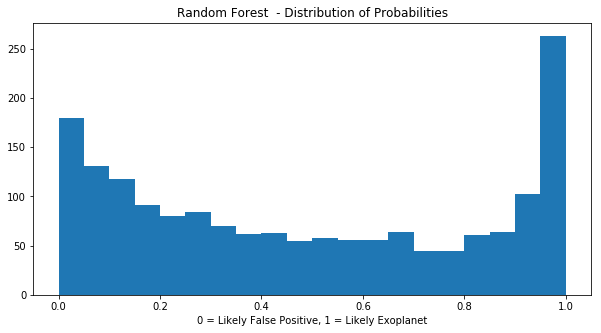

In [247]:
plt.figure(figsize=(10,5))
plt.title('Random Forest  - Distribution of Probabilities')
plt.xlabel('0 = Likely False Positive, 1 = Likely Exoplanet')
plt.hist(pred_final['RF Certainty'], bins=20)
plt.show()

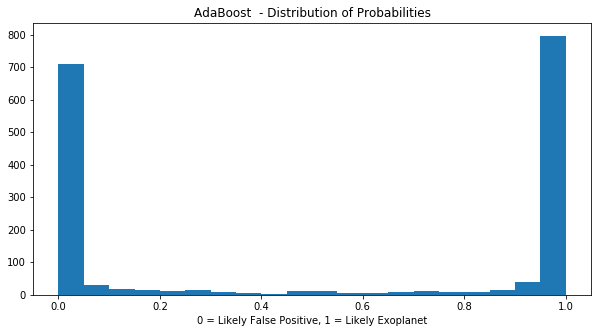

In [248]:
plt.figure(figsize=(10,5))
plt.title('AdaBoost  - Distribution of Probabilities')
plt.xlabel('0 = Likely False Positive, 1 = Likely Exoplanet')
plt.hist(pred_final['AdaBoost Certainty'], bins=20)
plt.show()

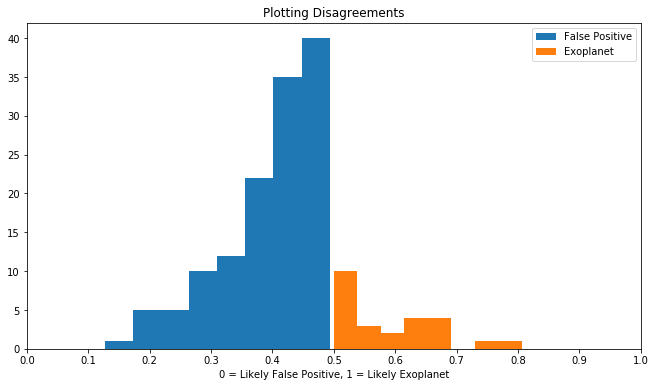

In [250]:
#Random Forest Probablities when they disagree
plt.figure(figsize=(11,6))
plt.title('Plotting Disagreements')
plt.xlabel('0 = Likely False Positive, 1 = Likely Exoplanet')
plt.hist(pred_final['RF Certainty'][(pred_final['Random Forest Predicted Disposition'] != pred_final['AdaBoost Predicted Disposition'])&(pred_final['RF Certainty']<0.5)], bins=8)
plt.hist(pred_final['RF Certainty'][(pred_final['Random Forest Predicted Disposition'] != pred_final['AdaBoost Predicted Disposition'])&(pred_final['RF Certainty']>=0.5)], bins=8)
plt.xticks(np.arange(0,1.01,0.1))
plt.legend(['False Positive','Exoplanet'])
plt.show()